In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime as DT
import io

In [50]:
premi=pd.read_csv('master_data/Premi_ClubQ8.csv', sep=';', index_col='COD_PAN_DA_POS', low_memory=False)
premi['DATA_OPERAZIONE'] = premi['DATA_OPERAZIONE'].astype('datetime64')
premi['DATA_OPERAZIONE'] = premi['DATA_OPERAZIONE'].dt.date
premi.head(10)

,DATA_OPERAZIONE,LUOGO_PRENOTAZIONE_PREMIO,CATEGORIA,RAGGRUPPAMENTO_MERCEOLOGICO,DESCRIZIONE,PUNTI_RICHIESTI,CONTRIBUTO_CLIENTE_CON_IVA
COD_PAN_DA_POS,,,,,,,
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
7071161603014051338,2020-09-01,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,"0,000000"
7071161603019207497,2020-09-01,PUNTO VENDITA,PREMIO FISICO,PER IL TUO BENESSERE,PRENOTAZIONE BILANCIA BODYMASTER ROWENTA,1650,"8,000000"
7071161603670632223,2020-09-01,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000"
7071161603670634369,2020-09-01,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000"
7071161603670706159,2020-09-01,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000"


In [60]:
clients=pd.read_csv('master_data/Anagrafica_ClubQ8.csv', sep=';', index_col='COD_PAN_DA_POS')
clients['DATA_NASCITA'] = clients['DATA_NASCITA'].astype('datetime64')
clients['DATA_NASCITA'] = clients['DATA_NASCITA'].dt.date
clients['DATA_BATTESIMO'] = clients['DATA_BATTESIMO'].astype('datetime64')
clients['DATA_BATTESIMO'] = clients['DATA_BATTESIMO'].dt.date
df = premi.merge(clients, how='inner', on='COD_PAN_DA_POS')
df.head(10)

,DATA_OPERAZIONE,LUOGO_PRENOTAZIONE_PREMIO,CATEGORIA,RAGGRUPPAMENTO_MERCEOLOGICO,DESCRIZIONE,PUNTI_RICHIESTI,CONTRIBUTO_CLIENTE_CON_IVA,SEX,DATA_NASCITA,REGIONE,PROVINCIA,COMUNE,TIPO_CARTA,DATA_BATTESIMO,SALDO_PUNTI
COD_PAN_DA_POS,,,,,,,,,,,,,,,
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN,M,1978-09-28,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2013-05-13,"3997,000000"
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN,M,1978-09-28,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2013-05-13,"3997,000000"
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN,M,1978-09-28,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2013-05-13,"3997,000000"
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN,M,1978-09-28,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2013-05-13,"3997,000000"
7071161603014051338,2020-09-01,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,"0,000000",M,1967-09-02,SICILIA,PALERMO,CEFALU',STARQ8_FISICA,2001-10-05,"5279,000000"
7071161603019207497,2020-09-01,PUNTO VENDITA,PREMIO FISICO,PER IL TUO BENESSERE,PRENOTAZIONE BILANCIA BODYMASTER ROWENTA,1650,"8,000000",F,1978-10-27,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2019-11-10,"1240,000000"
7071161603019207497,2021-04-20,PUNTO VENDITA,PREMIO FISICO,BELLEZZA & BENESSERE,PRENOTAZIONE PULSOXIMETRO DA DITO-ASS,1500,"5,000000",F,1978-10-27,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2019-11-10,"1240,000000"
7071161603670632223,2020-09-01,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000",M,1968-10-07,NaN,NaN,NaN,STARQ8_FISICA,2004-03-28,"9348,000000"
7071161603670632223,2020-09-10,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000",M,1968-10-07,NaN,NaN,NaN,STARQ8_FISICA,2004-03-28,"9348,000000"


In [112]:
#population by region
#https://datacommons.org/place/country/ITA?category=Demographics&hl=fr#Population

data = [['LOMBARDIA', 10060574], ['SICILIA', 4999891], ['CAMPANIA', 5801692], ['LAZIO', 5879082], ['PUGLIA', 4029053], ['TOSCANA', 3729641], ['PIEMONTE', 4356406], ['CALABRIA', 1947131], ['VENETO', 4905854], ['EMILIA ROMAGNA', 4459477], ['SARDEGNA', 1639591], ['FRIULI VENEZIA GIULIA', 1215220], ['ABRUZZO', 1311580], ['TRENTINO ALTO ADIGE', 1072276], ['BASILICATA', 562869], ['LIGURIA', 1550640], ['MARCHE', 1525271], ['UMBRIA', 882015], ['MOLISE', 305617], ["VALLE D'AOSTA", 125666]]
dfpop = pd.DataFrame(data, columns = ['REGIONE', 'POP_region'])
df1 = df.merge(dfpop, how='left', on='REGIONE')
df1.head(10)



,DATA_OPERAZIONE,LUOGO_PRENOTAZIONE_PREMIO,CATEGORIA,RAGGRUPPAMENTO_MERCEOLOGICO,DESCRIZIONE,PUNTI_RICHIESTI,CONTRIBUTO_CLIENTE_CON_IVA,SEX,DATA_NASCITA,REGIONE,PROVINCIA,COMUNE,TIPO_CARTA,DATA_BATTESIMO,SALDO_PUNTI,POP_region
52311,2020-09-15,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 860 PUNTI,430,"0,000000",M,1960-02-01,VENETO,VENEZIA,PORTOGRUARO,STARQ8_FISICA,2015-04-01,"1586,000000",4905854.0
341176,2021-03-11,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,PRENOTAZIONE BICCHIERE GUZZINI 4PZ,350,"0,000000",M,1966-04-14,VENETO,VENEZIA,SAN DONA' DI PIAVE,STARQ8_FISICA,2015-04-02,"2455,000000",4905854.0
341209,2021-03-11,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000",M,1986-03-12,VENETO,TREVISO,ASOLO,STARQ8_FISICA,2017-05-18,"562,000000",4905854.0
341208,2021-03-11,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 1290 PUNTI,430,"0,000000",M,1986-03-12,VENETO,TREVISO,ASOLO,STARQ8_FISICA,2017-05-18,"562,000000",4905854.0
341206,2021-03-11,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,CONSEGNA PASTA GAROFALO,650,"0,000000",F,1971-11-13,VENETO,VERONA,BUSSOLENGO,STARQ8_FISICA,2016-11-16,"189,000000",4905854.0
235584,2020-12-10,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE ASSE DA STIRO FOPPAPEDRETTI,5600,NaN,M,1954-09-09,VENETO,PADOVA,GALZIGNANO TERME,STARQ8_FISICA,2010-03-22,"3893,000000",4905854.0
235585,2020-12-10,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE STENDINO FOPPAPEDRETTI,5600,NaN,M,1954-09-09,VENETO,PADOVA,GALZIGNANO TERME,STARQ8_FISICA,2010-03-22,"3893,000000",4905854.0
341186,2021-03-11,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 1290 PUNTI,430,"0,000000",M,1967-09-29,VENETO,VICENZA,VICENZA,STARQ8_FISICA,2018-05-03,"1039,000000",4905854.0
341177,2021-03-11,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,PRENOTAZIONE BICCHIERE GUZZINI 4PZ,350,"0,000000",M,1966-04-14,VENETO,VENEZIA,SAN DONA' DI PIAVE,STARQ8_FISICA,2015-04-02,"2455,000000",4905854.0
235614,2020-12-10,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 860 PUNTI,430,"0,000000",M,1949-11-16,VENETO,VERONA,MALCESINE,STARQ8_FISICA,2016-11-02,"443,000000",4905854.0


In [191]:
#Dataframe with prizes claimed relative to region's population 
df_freq= pd.DataFrame(df['REGIONE'].value_counts()).reset_index()
df_freq = df_freq.rename(columns={'REGIONE': 'freq_prize', 'index': 'REGIONE'})
df2 = df_freq.merge(dfpop, how='inner', on='REGIONE')
df2['freq_prize_relative_pop']= 100 *df2['freq_prize']/df2['POP_region']
df2= df2.sort_values('freq_prize_relative_pop', axis=0, ascending=False, inplace=False)

#dummy for south regions 
df2['South']= np.where(df2['REGIONE'] == 'ABRUZZO', 1, 0)
df2.loc[df2['REGIONE'] == 'ABRUZZO', 'South'] = 1  
df2.loc[df2['REGIONE'] == 'PUGLIA', 'South'] = 1  
df2.loc[df2['REGIONE'] == 'BASILICATA', 'South'] = 1  
df2.loc[df2['REGIONE'] == 'CALABRIA', 'South'] = 1  
df2.loc[df2['REGIONE'] == 'CAMPANIA', 'South'] = 1  
df2.loc[df2['REGIONE'] == 'MOLISE', 'South'] = 1  
df2.loc[df2['REGIONE'] == 'SICILIA', 'South'] = 1  
df2.loc[df2['REGIONE'] == 'SARDEGNA', 'South'] = 1  

df2.head(30)

,REGIONE,freq_prize,POP_region,freq_prize_relative_pop,South
1,SICILIA,64262,4999891,1.285268,1
7,CALABRIA,21590,1947131,1.108811,1
2,CAMPANIA,61099,5801692,1.053124,1
10,SARDEGNA,16222,1639591,0.989393,1
14,BASILICATA,5228,562869,0.928813,1
4,PUGLIA,31226,4029053,0.775021,1
0,LOMBARDIA,77528,10060574,0.770612,0
3,LAZIO,41598,5879082,0.707559,0
5,TOSCANA,26372,3729641,0.707092,0
18,MOLISE,2102,305617,0.687789,1


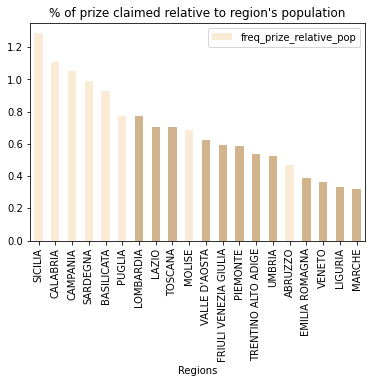

In [192]:
#prizes by region relative to pop

colors = {1: 'antiquewhite', 0: 'tan'}
#df['value'].plot(kind='bar', color=[colors[i] for i in df['South']])

plot= df2.plot.bar(x='REGIONE', y='freq_prize_relative_pop',  title= "% of prize claimed relative to region's population", xlabel='Regions', color=[colors[i] for i in df2['South']])


In [182]:
#Dataframe with prizes claimed relative to region's clients 

df3= pd.DataFrame(clients['REGIONE'].value_counts()).reset_index()
df3 = df3.rename(columns={'REGIONE': 'clients', 'index': 'REGIONE'})

df4 = df_freq.merge(df3, how='inner', on='REGIONE')
df4['freq_prize_relative_clients']= 100 *df4['freq_prize']/df4['clients']
df4= df4.sort_values('freq_prize_relative_clients', axis=0, ascending=False, inplace=False)
df4


,REGIONE,freq_prize,clients,freq_prize_relative_clients
19,VALLE D'AOSTA,788,1165,67.639485
12,ABRUZZO,6141,14607,42.041487
11,FRIULI VENEZIA GIULIA,7235,17971,40.259307
0,LOMBARDIA,77528,240771,32.199891
16,MARCHE,4889,15308,31.937549
1,SICILIA,64262,201247,31.931905
17,UMBRIA,4627,14890,31.074547
9,EMILIA ROMAGNA,17316,57308,30.215677
10,SARDEGNA,16222,55092,29.445292
8,VENETO,17698,60169,29.413818


In [183]:
#dummy for south regions 
df4['South']= np.where(df4['REGIONE'] == 'ABRUZZO', 1, 0)
df4.loc[df4['REGIONE'] == 'ABRUZZO', 'South'] = 1  
df4.loc[df4['REGIONE'] == 'PUGLIA', 'South'] = 1  
df4.loc[df4['REGIONE'] == 'BASILICATA', 'South'] = 1  
df4.loc[df4['REGIONE'] == 'CALABRIA', 'South'] = 1  
df4.loc[df4['REGIONE'] == 'CAMPANIA', 'South'] = 1  
df4.loc[df4['REGIONE'] == 'MOLISE', 'South'] = 1  
df4.loc[df4['REGIONE'] == 'SICILIA', 'South'] = 1  
df4.loc[df4['REGIONE'] == 'SARDEGNA', 'South'] = 1  

df4.head(30)

,REGIONE,freq_prize,clients,freq_prize_relative_clients,South
19,VALLE D'AOSTA,788,1165,67.639485,0
12,ABRUZZO,6141,14607,42.041487,1
11,FRIULI VENEZIA GIULIA,7235,17971,40.259307,0
0,LOMBARDIA,77528,240771,32.199891,0
16,MARCHE,4889,15308,31.937549,0
1,SICILIA,64262,201247,31.931905,1
17,UMBRIA,4627,14890,31.074547,0
9,EMILIA ROMAGNA,17316,57308,30.215677,0
10,SARDEGNA,16222,55092,29.445292,1
8,VENETO,17698,60169,29.413818,0


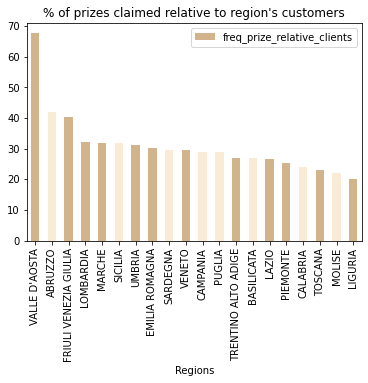

In [204]:
#prizes by region relative to clients

colors = {1: 'antiquewhite', 0: 'tan'}
plot= df4.plot.bar(x='REGIONE', y='freq_prize_relative_clients',  title= "% of prizes claimed relative to region's customers", xlabel='Regions', color=[colors[i] for i in df4['South']])


In [203]:
#Dataframe with Q8 loyalty program relative to region's population 
df5 = df4.merge(df2, how='inner', on='REGIONE')
df5.drop('freq_prize_y', axis=1, inplace=True)
df5['freq_clients_relative_pop']= 100 *df5['clients']/df5['POP_region']
df5= df5.sort_values('freq_clients_relative_pop', axis=0, ascending=False, inplace=False)
df5

,REGIONE,freq_prize_x,clients,freq_prize_relative_clients,South_x,POP_region,freq_prize_relative_pop,South_y,freq_clients_relative_pop
16,CALABRIA,21590,89785,24.046333,1,1947131,1.108811,1,4.611143
5,SICILIA,64262,201247,31.931905,1,4999891,1.285268,1,4.025028
10,CAMPANIA,61099,211322,28.912749,1,5801692,1.053124,1,3.642420
13,BASILICATA,5228,19453,26.875032,1,562869,0.928813,1,3.456044
8,SARDEGNA,16222,55092,29.445292,1,1639591,0.989393,1,3.360106
18,MOLISE,2102,9458,22.224572,1,305617,0.687789,1,3.094723
17,TOSCANA,26372,113771,23.179896,0,3729641,0.707092,0,3.050454
11,PUGLIA,31226,108151,28.872595,1,4029053,0.775021,1,2.684278
14,LAZIO,41598,156526,26.575777,0,5879082,0.707559,0,2.662422
3,LOMBARDIA,77528,240771,32.199891,0,10060574,0.770612,0,2.393213


In [205]:
colors = {1: 'antiquewhite', 0: 'tan'}
plot= df5.plot.bar(x='REGIONE', y='freq_clients_relative_pop',  title= "% of Q8 loyalty program customers relative to region's population", xlabel='Regions', color=[colors[i] for i in df4['South']])


KeyError: 'SEX'

In [219]:
#nbre prize claimed by sex relative to the number of customer (by sex) --> to see if on average men or women claime prize more often
df6= pd.DataFrame(clients['SEX'].value_counts()).reset_index()
df6 = df6.rename(columns={'SEX': 'freq_sex', 'index': 'SEX'})
df7= pd.DataFrame(df['SEX'].value_counts()).reset_index()
df7 = df7.rename(columns={'SEX': 'freq_prize', 'index': 'SEX'})
df8 = df6.merge(df7, how='inner', on='SEX')
df8['freq_prize_relative_sex']= 100 *df8['freq_prize']/df8['freq_sex']
df8= df8.sort_values('freq_prize_relative_sex', axis=0, ascending=False, inplace=False)
df8

,SEX,freq_sex,freq_prize,freq_prize_relative_sex
0,M,1114651,344889,30.941434
1,F,541485,133531,24.660148


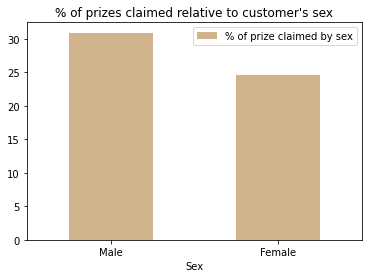

In [232]:
df8.loc[df8['SEX'] == 'M', 'SEX'] = 'Male'  
df8.loc[df8['SEX'] == 'F', 'SEX'] = 'Female'  

plot= df8.plot.bar(x='SEX', y='freq_prize_relative_sex', label= '% of prize claimed by sex', xlabel='Sex', title= "% of prizes claimed relative to customer's sex",  color='tan', rot=0)
